<a href="https://colab.research.google.com/github/abstractguy/crypto_bot/blob/master/crypto_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cryptocurrency trading bot.

Hardcoded parameters.

In [0]:
symbol = 'BTCUSDT'
period = '15 minutes ago UTC'
interval = '1m'
api_key = 'yoyoyo'
api_secret = 'yeyeye'

Installs.

In [2]:
!pip install python-binance --upgrade --no-cache-dir

Requirement already up-to-date: python-binance in /usr/local/lib/python3.6/dist-packages (0.7.5)


Library imports.

In [0]:
%matplotlib inline

from binance.client import Client
from binance.enums import *
from binance.exceptions import BinanceAPIException
from time import sleep

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Function definitions.

In [0]:
def heikin_ashi(df):
    df = df.tz_localize(tz=None, ambiguous='infer')
    df = df[['Open', 'High', 'Low', 'Close']].copy().astype('float')
    heikin_ashi_df = pd.DataFrame(index=df.index.values, columns=['Open', 'High', 'Low', 'Close'])
    heikin_ashi_df['Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

    for i in range(len(df)):
        if i == 0:
            heikin_ashi_df.iat[0, 0] = df['Open'].iloc[0]
        else:
            heikin_ashi_df.iat[i, 0] = (heikin_ashi_df.iat[i - 1, 0] + heikin_ashi_df.iat[i - 1, 3]) / 2

    heikin_ashi_df['High'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['High']).max(axis=1)
    heikin_ashi_df['Low'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['Low']).min(axis=1)

    return heikin_ashi_df

def download_dataset(symbol=symbol):
    dataset_downloaded = \
        client.get_historical_klines(symbol=symbol, 
                                     interval=interval, 
                                     start_str=period)

    dataset_downloaded = pd.DataFrame(dataset_downloaded, 
                                      columns=['time', 
                                               'Open', 
                                               'High', 
                                               'Low', 
                                               'Close', 
                                               'Volume', 
                                               'Close time', 
                                               'Quote asset volume', 
                                               'Number of trades', 
                                               'Taker buy base asset volume', 
                                               'Taker buy quote asset volume', 
                                               'Ignore'])

    four_hours = 14400
    milliseconds = 1000

    dataset_downloaded['time'] = \
        dataset_downloaded['time'].apply(lambda timestamp: \
                                         datetime.datetime.fromtimestamp((timestamp / \
                                                                          milliseconds) - \
                                                                         four_hours))

    dataset_downloaded = dataset_downloaded[['time', 
                                             'Open', 
                                             'High', 
                                             'Low', 
                                             'Close', 
                                             'Volume', 
                                             'Number of trades']]

    dataset_downloaded.set_index('time', inplace=True)

    return dataset_downloaded

Download cryptocurrency symbol data.

In [5]:
client = Client(api_key, api_secret)
dataset_downloaded = download_dataset()
dataset_downloaded

,Open,High,Low,Close,Volume,Number of trades
time,,,,,,
2020-03-18 01:44:00,5340.24000000,5340.24000000,5335.00000000,5335.81000000,21.24381400,229
2020-03-18 01:45:00,5336.28000000,5342.92000000,5336.28000000,5336.63000000,27.62073200,367
2020-03-18 01:46:00,5336.50000000,5343.01000000,5335.00000000,5343.01000000,17.61265800,264
2020-03-18 01:47:00,5343.04000000,5344.00000000,5336.53000000,5341.44000000,27.15088400,286
2020-03-18 01:48:00,5341.48000000,5349.71000000,5340.17000000,5348.44000000,44.18704600,419
2020-03-18 01:49:00,5348.71000000,5348.94000000,5340.24000000,5342.93000000,19.91085700,255
2020-03-18 01:50:00,5343.93000000,5345.65000000,5343.55000000,5344.51000000,9.42361100,213
2020-03-18 01:51:00,5345.18000000,5346.61000000,5340.00000000,5340.00000000,45.79761600,212
2020-03-18 01:52:00,5341.08000000,5341.08000000,5329.22000000,5329.61000000,34.38376000,277


Download testing area -->

<-- End of download testing area.

*** To avoid downloading multiple times, restart here. ***

In [6]:
dataset = dataset_downloaded.copy()
dataset

,Open,High,Low,Close,Volume,Number of trades
time,,,,,,
2020-03-18 01:44:00,5340.24000000,5340.24000000,5335.00000000,5335.81000000,21.24381400,229
2020-03-18 01:45:00,5336.28000000,5342.92000000,5336.28000000,5336.63000000,27.62073200,367
2020-03-18 01:46:00,5336.50000000,5343.01000000,5335.00000000,5343.01000000,17.61265800,264
2020-03-18 01:47:00,5343.04000000,5344.00000000,5336.53000000,5341.44000000,27.15088400,286
2020-03-18 01:48:00,5341.48000000,5349.71000000,5340.17000000,5348.44000000,44.18704600,419
2020-03-18 01:49:00,5348.71000000,5348.94000000,5340.24000000,5342.93000000,19.91085700,255
2020-03-18 01:50:00,5343.93000000,5345.65000000,5343.55000000,5344.51000000,9.42361100,213
2020-03-18 01:51:00,5345.18000000,5346.61000000,5340.00000000,5340.00000000,45.79761600,212
2020-03-18 01:52:00,5341.08000000,5341.08000000,5329.22000000,5329.61000000,34.38376000,277


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



,Open,High,Low,Close
2020-03-18 01:44:00,5340.24,5340.240000,5335.000000,5337.8225
2020-03-18 01:45:00,5339.03,5342.920000,5336.280000,5338.0275
2020-03-18 01:46:00,5338.53,5343.010000,5335.000000,5339.3800
2020-03-18 01:47:00,5338.95,5344.000000,5336.530000,5341.2525
2020-03-18 01:48:00,5340.1,5349.710000,5340.103594,5344.9500
2020-03-18 01:49:00,5342.53,5348.940000,5340.240000,5345.2050
2020-03-18 01:50:00,5343.87,5345.650000,5343.550000,5344.4100
2020-03-18 01:51:00,5344.14,5346.610000,5340.000000,5342.9475
2020-03-18 01:52:00,5343.54,5343.542725,5329.220000,5335.2475
2020-03-18 01:53:00,5339.4,5339.395112,5305.000000,5318.3825


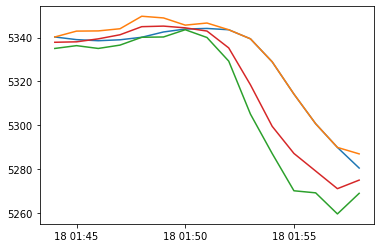

In [7]:
heikin_ashi_dataset = heikin_ashi(dataset)
plt.plot(heikin_ashi_dataset)
heikin_ashi_dataset

In [8]:
fig = go.Figure(data=[go.Candlestick(x=heikin_ashi_dataset.index.to_series(), 
                                     open=heikin_ashi_dataset['Open'], 
                                     high=heikin_ashi_dataset['High'], 
                                     low=heikin_ashi_dataset['Low'], 
                                     close=heikin_ashi_dataset['Close'])])

fig.show()

2020-03-18 01:44:00    0
2020-03-18 01:45:00    0
2020-03-18 01:46:00    1
2020-03-18 01:47:00    1
2020-03-18 01:48:00    1
2020-03-18 01:49:00    1
2020-03-18 01:50:00    1
2020-03-18 01:51:00    0
2020-03-18 01:52:00    0
2020-03-18 01:53:00    0
2020-03-18 01:54:00    0
2020-03-18 01:55:00    0
2020-03-18 01:56:00    0
2020-03-18 01:57:00    0
2020-03-18 01:58:00    0
dtype: int64

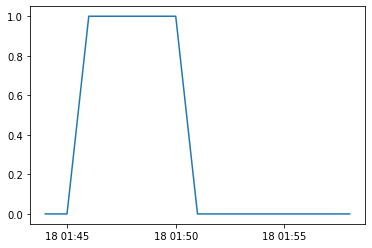

In [9]:
latent_trend = ((heikin_ashi_dataset['Close'] - heikin_ashi_dataset['Open']) > 0).astype(int)
plt.plot(latent_trend)
latent_trend

In [0]:
#list(filter(lambda x: float(x['free']) != 0.0, client.get_account()['balances']))

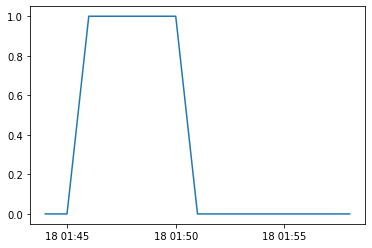

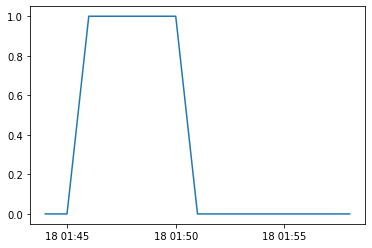

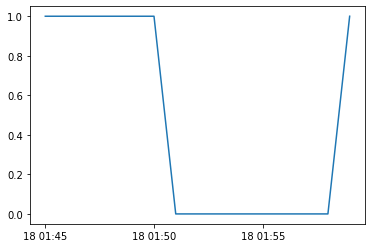

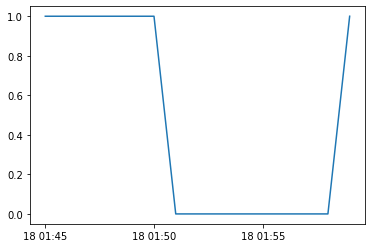

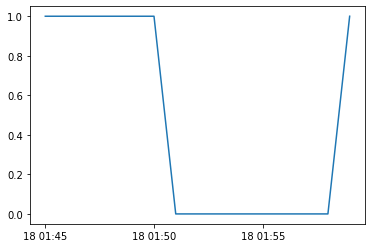

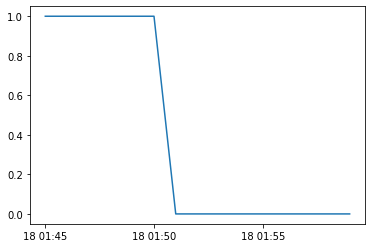

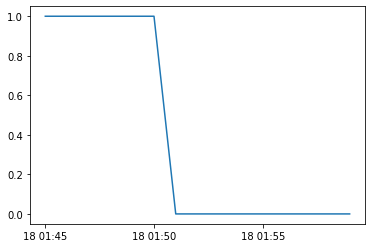

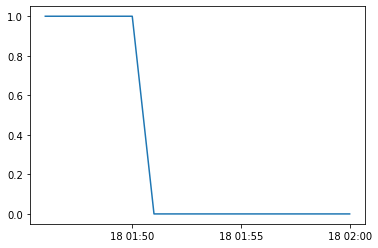

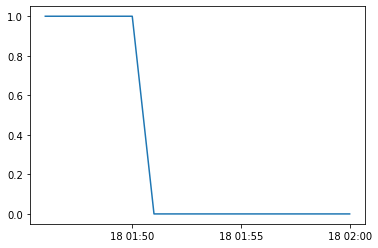

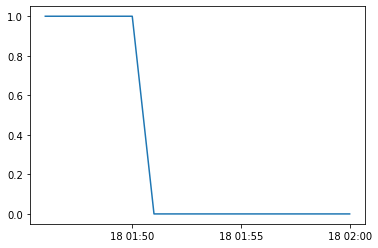

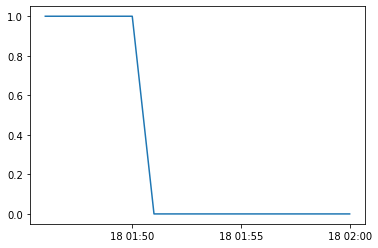

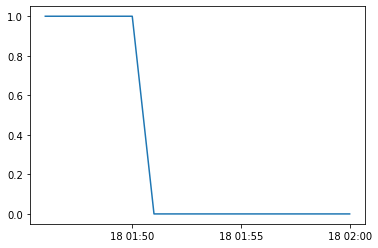

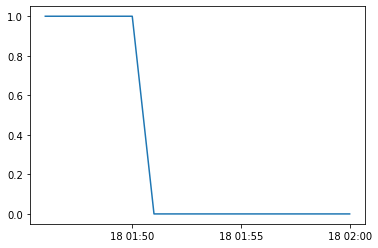

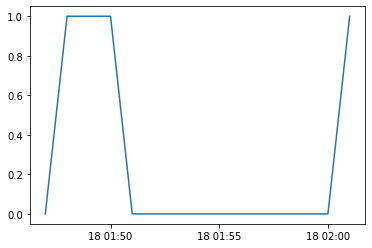

In [0]:
position = 'sell'

while True:
    try:
        sleep(10)
        dataset = download_dataset(symbol=symbol)
        dataset = heikin_ashi(dataset)
        latent_trend = ((dataset['Close'] - dataset['Open']) > 0).astype(int)
        plt.plot(latent_trend)
        plt.show()

        if latent_trend[-1] == 1 and latent_trend[-2] == 1 and position == 'sell':
            position = 'buy'
            client.create_order(symbol=symbol, 
                                side=Client.SIDE_BUY, 
                                type=Client.ORDER_TYPE_MARKET, 
                                quantity=0.009, 
                                recvWindow=10000)

        elif latent_trend[-1] == 0 and latent_trend[-2] == 0 and position == 'buy':
            position = 'sell'
            client.create_order(symbol=symbol, 
                                side=Client.SIDE_SELL, 
                                type=Client.ORDER_TYPE_MARKET, 
                                quantity=0.009, 
                                recvWindow=10000)
    except:
        if position == 'sell':
            position == 'buy'
        elif position == 'buy':
            position == 'sell'
